# **PCA Reduction of Penguins Dataset** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd

# Load the dataset
penguins = pd.read_pickle("penguins_dataset.pkl")

# Convert to a DataFrame (if not already)
df = pd.DataFrame(penguins)

df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female

In [2]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [3]:
# OR drop rows in place (modifies the DataFrame directly)
df.dropna(inplace=True)

In [4]:
print(df.count())  

species              333
island               333
bill_length_mm       333
bill_depth_mm        333
flipper_length_mm    333
body_mass_g          333
sex                  333
dtype: int64


In [5]:
# Select features (numerical) and target
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_numerical_features = df[numerical_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerical_features)

pca = PCA(n_components=len(numerical_features))
X_pca = pca.fit_transform(X_scaled)

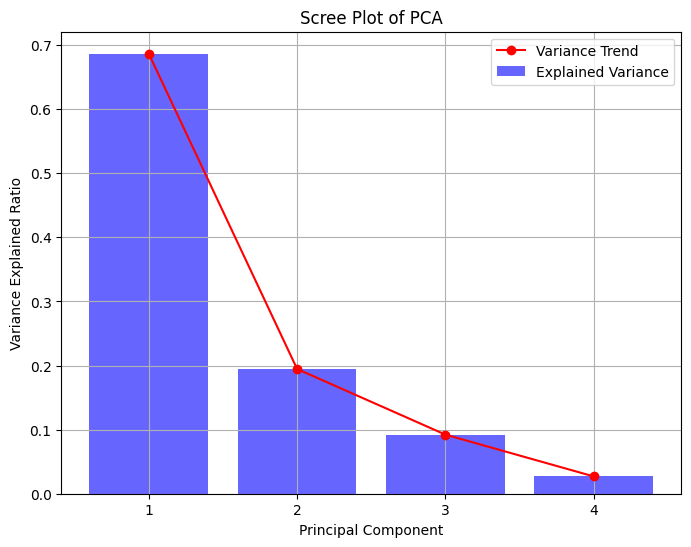


Cumulative Explained Variance by PCA Components:
PC1: 0.6863 (68.63%)
PC2: 0.8809 (88.09%)
PC3: 0.9730 (97.30%)
PC4: 1.0000 (100.00%)


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Scree Plot (Bar Chart + Line Graph)
plt.figure(figsize=(8, 6))
num_components = pca.n_components_

plt.bar(range(1, num_components + 1), pca.explained_variance_ratio_, alpha=0.6, color='blue', label="Explained Variance")
plt.plot(range(1, num_components + 1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='red', label="Variance Trend")

plt.xlabel("Principal Component")
plt.ylabel("Variance Explained Ratio")
plt.title("Scree Plot of PCA")
plt.xticks(range(1, num_components + 1))
plt.legend()
plt.grid(True)
plt.show()

# Compute cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Print cumulative variance for each component
print("\nCumulative Explained Variance by PCA Components:")
for i, var in enumerate(cumulative_variance):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")


### **Scree Plot Interpretation**

The scree plot shows that **PC1** and **PC2** together account for approximately **88% of the explained variance**, indicating that these two principal components capture most of the variability in the dataset. **PC1 alone contributes the most significant proportion**, suggesting that a large part of the data’s structure can be understood through this component. While **PC3 and PC4 add some additional variance**, their contributions are relatively small, and incorporating them may introduce unnecessary complexity without substantial improvement in data representation. Therefore, focusing on **PC1 and PC2** would likely be sufficient for dimensionality reduction while maintaining meaningful patterns in the dataset.


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_58013/1635037705.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolors='k', cmap='viridis')


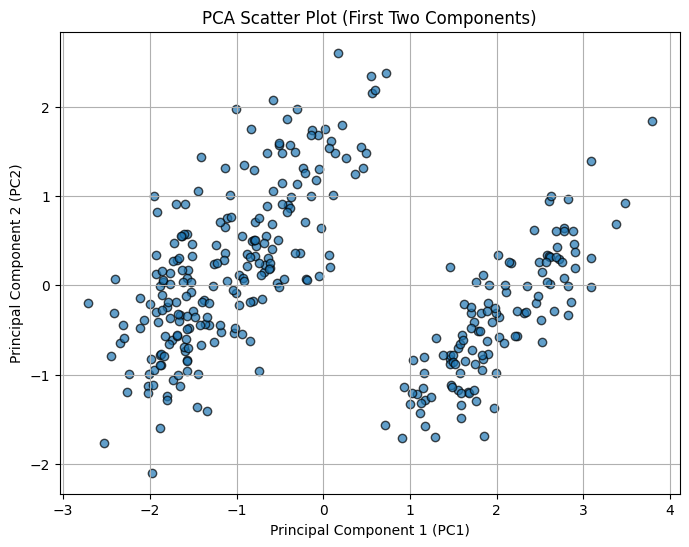

In [7]:
import matplotlib.pyplot as plt

# Scatter plot of first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolors='k', cmap='viridis')

plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA Scatter Plot (First Two Components)")
plt.grid(True)
plt.show()


In [8]:
import pandas as pd

# Get PCA loadings (coefficients of original features in principal components)
loadings = pd.DataFrame(
    pca.components_,  # Principal component loadings
    columns=numerical_features,  # Original feature names
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Print the PCA loading matrix (coefficients)
print("PCA Loadings (Coefficients):")
print(loadings)


PCA Loadings (Coefficients):
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
PC1        0.453753      -0.399047           0.576825     0.549675
PC2        0.600195       0.796170           0.005788     0.076464
PC3        0.642495      -0.425800          -0.236095    -0.591737
PC4       -0.145170       0.159904           0.781984    -0.584686


## **PCA Loadings Interpretation**  
The PCA loadings reveal how strongly each original feature contributes to each principal component. **PC1** is primarily influenced by `flipper_length_mm` (0.58), `body_mass_g` (0.55), and `bill_length_mm` (0.45), suggesting it represents overall **size and mass**. **PC2** is dominated by `bill_depth_mm` (0.80) and `bill_length_mm` (0.60), likely capturing **bill shape variation**. **PC3** is strongly linked to `bill_length_mm` (0.64) and `body_mass_g` (-0.59), indicating an inverse relationship between **bill length and body mass**. **PC4** is largely driven by `flipper_length_mm` (0.78) and `body_mass_g` (-0.58), suggesting it reflects **flipper size relative to body mass**. These results show that **bill shape, body mass, and flipper size** are the key factors in variation within the dataset.


## **PCA Component Equations & Interpretations**

$PC1 = (0.454 \times \text{bill\_length\_mm}) + (-0.399 \times \text{bill\_depth\_mm}) + (0.577 \times \text{flipper\_length\_mm}) + (0.550 \times \text{body\_mass\_g})$

$PC2 = (0.600 \times \text{bill\_length\_mm}) + (0.796 \times \text{bill\_depth\_mm}) + (0.006 \times \text{flipper\_length\_mm}) + (0.076 \times \text{body\_mass\_g})$

$PC3 = (0.642 \times \text{bill\_length\_mm}) + (-0.426 \times \text{bill\_depth\_mm}) + (-0.236 \times \text{flipper\_length\_mm}) + (-0.592 \times \text{body\_mass\_g})$

$PC4 = (-0.145 \times \text{bill\_length\_mm}) + (0.160 \times \text{bill\_depth\_mm}) + (0.782 \times \text{flipper\_length\_mm}) + (-0.585 \times \text{body\_mass\_g})$

### **Interpretation**
PC1 reflects overall size, driven by flipper length, body mass, and bill length. PC2 captures bill shape variation, strongly influenced by both bill length and depth. PC3 highlights a trade-off between longer bills and lower body mass, revealing an inverse relationship between those features. Finally, PC4 contrasts flipper size against body mass, identifying penguins with disproportionately long flippers relative to their weight. Together, these components uncover key patterns in morphological diversity across penguins.


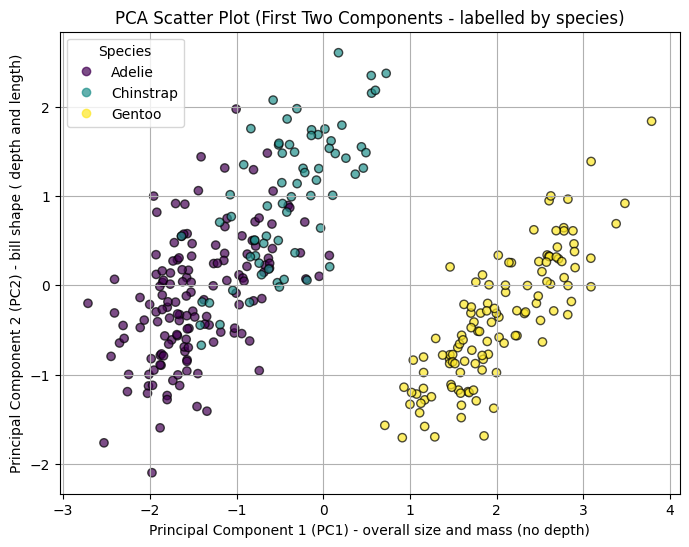

In [9]:

# Scatter plot of first two principal components, colored by species
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["species"].astype('category').cat.codes, 
                       alpha=0.7, edgecolors='k', cmap='viridis')

# Add legend with species labels
plt.xlabel("Principal Component 1 (PC1) - overall size and mass (no depth)")
plt.ylabel("Principal Component 2 (PC2) - bill shape ( depth and length)")
plt.title("PCA Scatter Plot (First Two Components - labelled by species)")

# Create a legend with species names
legend_labels = dict(enumerate(df["species"].astype('category').cat.categories))
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels.values(), title="Species")

plt.grid(True)
plt.show()


### **PCA Scatter Plot Interpretation**  

The scatter plot visualises the **first two principal components (PC1 and PC2)**, which summarise the main variations in the dataset. **Gentoo penguins** (yellow) generally have a **larger overall size and mass**, as seen by their position along PC1. They exhibit **some variation in bill shape (PC2),** but overall, they are **distinct from the other species**.  

**Adelie and Chinstrap penguins** (purple and teal) show **some overlap**, indicating similarities in their physical features. However, **Chinstrap penguins** tend to have a **larger overall size (PC1)** and **longer, deeper bills (PC2)** compared to Adelie. The separation between these two species is less pronounced, suggesting **greater intra-species variability**.  

Gentoo penguins are **the most distinct species**, with **larger bodies and different bill proportions** compared to both Adelie and Chinstrap. This highlights how PCA effectively **captures key morphological differences** among species, reducing the dataset’s complexity while preserving meaningful biological variation.


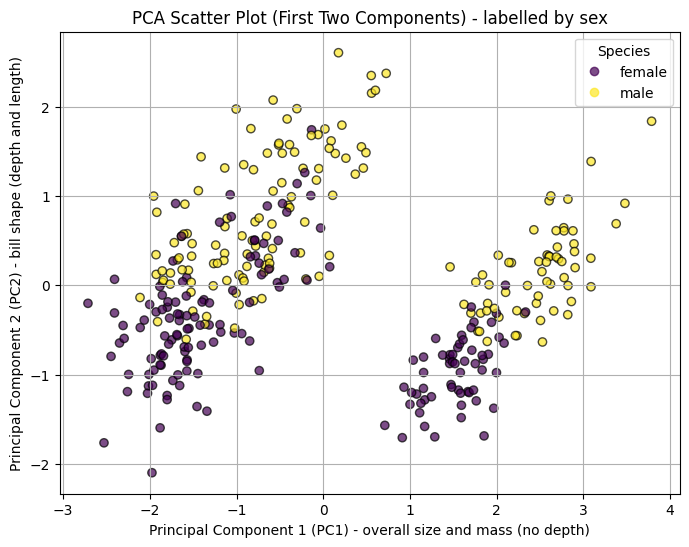

In [10]:
# Scatter plot of first two principal components, colored by species
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["sex"].astype('category').cat.codes, 
                       alpha=0.7, edgecolors='k', cmap='viridis')

# Add legend with species labels
plt.xlabel("Principal Component 1 (PC1) - overall size and mass (no depth)")
plt.ylabel("Principal Component 2 (PC2) - bill shape (depth and length)")
plt.title("PCA Scatter Plot (First Two Components) - labelled by sex")

# Create a legend with species names
legend_labels = dict(enumerate(df["sex"].astype('category').cat.categories))
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels.values(), title="Species")

plt.grid(True)
plt.show()


### **PCA Scatter Plot Analysis - Sex Differences**  

The scatter plot highlights **distinct sexual dimorphism** in penguins, with **males (yellow)** generally exhibiting **larger body size and mass**, as reflected by their clustering towards the **right along PC1**. This suggests that **PC1 is strongly influenced by body mass and overall size-related features, such as flipper length**. In contrast, **females (purple)** are positioned further **left**, indicating their **smaller overall size and lighter body mass**.  

Along **PC2**, which represents **bill shape variation (depth and length)**, males tend to display **greater variability**, spanning a broader range of values, suggesting that **male penguins exhibit more diverse bill structures**. Females, however, are more **concentrated within a narrower band**, implying **greater consistency in bill shape across individuals**. This pattern suggests that **males not only tend to be larger overall but also exhibit more pronounced variability in bill morphology, possibly due to ecological or sexual selection pressures**.  

Despite **some overlap** between the sexes, the clear **separation along PC1 confirms that body size is the most distinguishing feature**, while PC2 captures **additional bill shape differences**. This provides strong evidence of **sex-based morphological variation in penguins**, where males are **larger, heavier, and more variable in bill dimensions**, while females are **smaller and more uniform in structure**.  


---

### **PCA Summary on the Penguin Dataset**

Principal Component Analysis (PCA) was applied to reduce the dimensionality of the penguin dataset while retaining the most informative variance. The criterion for dimensionality reduction was based on the proportion of explained variance, as visualised in the scree plot. The first two principal components (PC1 and PC2) accounted for approximately **88% of the total variance**, justifying their selection for further analysis and visualisation. PCA loadings indicated that **PC1** captured overall size and mass, with strong positive contributions from flipper length, body mass, and bill length. **PC2** highlighted bill shape variation, driven primarily by bill depth and bill length. Visualisations of the reduced feature space revealed clear species-level separation: **Gentoo penguins** clustered distinctly due to their larger size and heavier mass, while **Adelie** and **Chinstrap** penguins overlapped more, though Chinstraps generally had deeper and longer bills. PCA also revealed **sex-based morphological differences**, with **males tending to be larger and more variable**, and **females being smaller and more consistent**, especially along PC1. Overall, PCA effectively reduced complexity while preserving key biological variation, offering interpretable insights into both interspecies and intraspecies morphological traits. This dimensionality reduction enabled clearer class separation in subsequent SVM classification models and provided meaningful biological interpretations based on body size and bill morphology.


---

# **LDA Reduction of Penguins Dataset**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (assuming 'df' is already defined)
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[numerical_features]  # Features
y = df['species']  # Target: species classification

# Encode categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert species names into numbers
target_names = label_encoder.classes_  # Store original species names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split data into training and test sets (stratified to maintain class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (266, 4)
Test set shape: (67, 4)


In [13]:
# Create and fit the LDA model
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=2)

In [14]:

# Transform both training and test data to 2-dimensional space
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

print("Original number of features:", X_train.shape[1])
print("Reduced number of features:", X_train_lda.shape[1])

Original number of features: 4
Reduced number of features: 2


In [15]:
# Get LDA scalings (actual loadings for LD1, LD2)
lda_loadings = pd.DataFrame(lda.scalings_, 
                            index=numerical_features, 
                            columns=["LD1", "LD2"])  # Adjust columns based on components used

# Display the LDA loadings
print(lda_loadings)


                        LD1       LD2
bill_length_mm     0.445158  2.214223
bill_depth_mm     -2.013245  0.027499
flipper_length_mm  1.113521 -0.262782
body_mass_g        1.158066 -1.211505


### **LDA Loadings Interpretation**

Linear Discriminant Analysis (LDA) projects the dataset onto new axes (LD1 and LD2) that maximise separation between predefined classes — in this case, male and female penguins. The **LD1 component** is primarily influenced by **bill depth (-2.01)**, **body mass (+1.16)**, and **flipper length (+1.11)**. This means LD1 effectively captures the contrast between **bill depth** and **overall body size**, with males typically having **larger body mass and flipper length**, and females tending to have **shallower bills**. The **LD2 component** is dominated by **bill length (+2.21)** and **body mass (-1.21)**, indicating a trade-off between **bill length and body mass**, although this component contributes less to the class separation. Overall, **LD1 is the primary axis of discrimination**, reflecting key morphological differences between the sexes, while LD2 captures more subtle patterns in the data.

---

### **LDA Component Equations**

- $LD1 = (0.445 \times \text{bill\_length\_mm}) + (-2.013 \times \text{bill\_depth\_mm}) + (1.114 \times \text{flipper\_length\_mm}) + (1.158 \times \text{body\_mass\_g})$

- $LD2 = (2.214 \times \text{bill\_length\_mm}) + (0.027 \times \text{bill\_depth\_mm}) + (-0.263 \times \text{flipper\_length\_mm}) + (-1.212 \times \text{body\_mass\_g})$


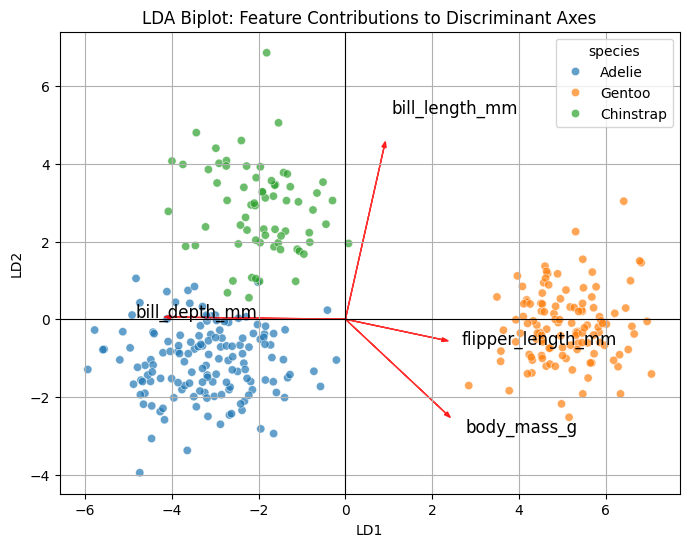

In [16]:
# Transform data using LDA
X_lda = lda.transform(X_scaled)

# Get LDA loadings (scalings)
lda_loadings = pd.DataFrame(lda.scalings_, 
                            index=numerical_features, 
                            columns=["LD1", "LD2"])

# Plot LDA projection with species labels
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette="tab10", alpha=0.7)
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA Biplot: Feature Contributions to Discriminant Axes")

# Add feature vectors (scaled for visibility)
scaling_factor = 2  # Adjust to prevent overlap
for i, feature in enumerate(numerical_features):
    plt.arrow(0, 0, lda.scalings_[i, 0] * scaling_factor, lda.scalings_[i, 1] * scaling_factor,
              color='red', alpha=0.8, head_width=0.1)
    plt.text(lda.scalings_[i, 0] * scaling_factor * 1.2, 
             lda.scalings_[i, 1] * scaling_factor * 1.2, 
             feature, color='black', fontsize=12)

plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.grid()
plt.show()


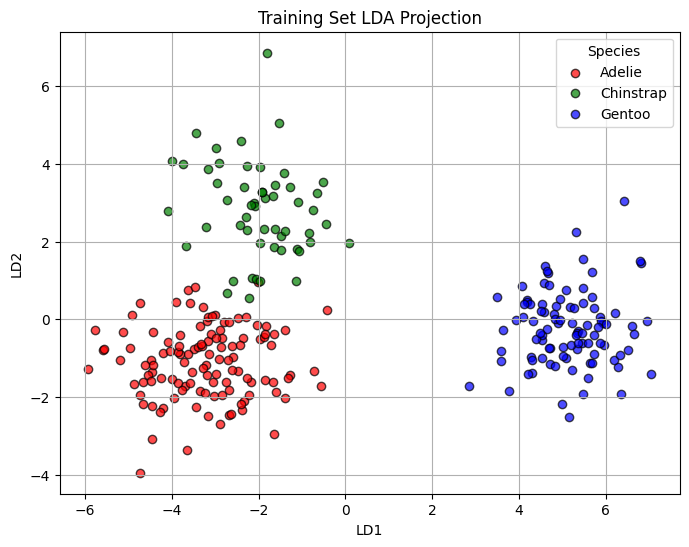

In [17]:
# Plot LDA projection of the training set
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
for i, color in zip(np.unique(y_train), colors):
    plt.scatter(
        X_train_lda[y_train == i, 0],
        X_train_lda[y_train == i, 1],
        label=target_names[i],
        color=color,
        alpha=0.7,
        edgecolors='k'
    )

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Training Set LDA Projection')
plt.legend(title="Species")
plt.grid(True)
plt.show()


### **LDA Component Equations & Interpretations (Species Classification)**  

Linear Discriminant Analysis (LDA) constructs linear combinations of features to maximise class separation among penguin species. The first discriminant function, **LD1**, is primarily responsible for distinguishing **Gentoo from Adelie and Chinstrap** based on overall size and mass. The equation for LD1 is:  

$
LD1 = (0.445 \times \text{bill\_length\_mm}) + (-2.013 \times \text{bill\_depth\_mm}) + (1.114 \times \text{flipper\_length\_mm}) + (1.158 \times \text{body\_mass\_g})
$  

The most influential features in LD1 are **bill depth (negative), flipper length, and body mass (positive)**. Gentoo penguins, which are generally **larger, heavier, and have longer flippers but shallower bills**, are pushed to one side of the axis, while Adelie and Chinstrap, which have **smaller body mass and shorter flippers but deeper bills**, remain clustered together. This suggests that overall body size and mass are key factors in distinguishing Gentoo from the other species.  

The second discriminant function, **LD2**, captures variation in **bill shape**, effectively distinguishing **Adelie from Chinstrap**. The equation for LD2 is:  

$
LD2 = (2.214 \times \text{bill\_length\_mm}) + (0.027 \times \text{bill\_depth\_mm}) + (-0.263 \times \text{flipper\_length\_mm}) + (-1.212 \times \text{body\_mass\_g})
$

The dominant factor in LD2 is **bill length (strong positive weight)**, which means **Chinstrap penguins, having significantly longer bills, are clearly separated from Adelie penguins, which have shorter and deeper bills**. Body mass also has some influence, but in the opposite direction, reinforcing the idea that **Chinstrap penguins are generally lighter than Adelie**.  

In the LDA projection, **Gentoo is the most distinct species due to its significantly larger size and mass, whereas Adelie and Chinstrap exhibit some overlap, as their body sizes are more similar**. However, the difference in **bill length** ensures that Chinstrap remains distinguishable from Adelie along LD2. Bill depth, while influential in LD1, does not contribute much to LD2, indicating that **it is critical for differentiating Gentoo from the other species but not for separating Adelie and Chinstrap**.  

The model achieved **100% accuracy**, with perfect precision and recall for all three species, indicating an **optimal separation in the transformed space**. The classification report confirms that **no misclassifications occurred, meaning LD1 and LD2 fully encapsulate the variability necessary for species differentiation**. This further demonstrates that **body size and flipper length are crucial for identifying Gentoo, while bill length is the defining trait for distinguishing Adelie and Chinstrap**.


---

# **LDA for Sex Classification**



In [18]:
# Evaluate LDA model
y_pred = lda.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Test Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [19]:
# Define numerical features for LDA
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Extract feature matrix X and target vector y (using 'sex' instead of 'species')
X = df[numerical_features]
y = df['sex']

# Encode 'sex' as numerical (e.g., 0 = Female, 1 = Male)
le = LabelEncoder()
y = le.fit_transform(y)  # Converts 'Male'/'Female' into 0s and 1s

# Split data into training and test sets (80-20 split, stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)


In [20]:
# Create and fit LDA model (1 component since we only have 2 classes)
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)

# Transform both training and test data to 1D space
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Print dimensions
print(f"Original feature count: {X_train.shape[1]}")
print(f"Reduced feature count: {X_train_lda.shape[1]}")


Original feature count: 4
Reduced feature count: 1


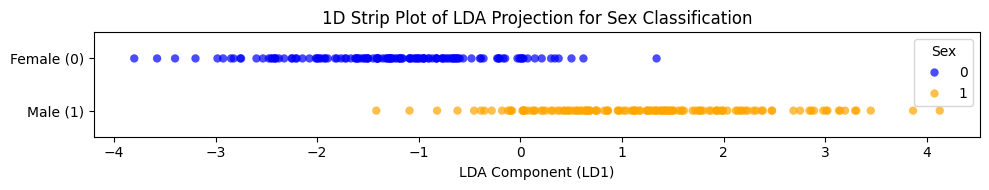

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a DataFrame for easy plotting
lda_df = pd.DataFrame({
    "LD1": X_train_lda[:, 0],
    "Sex": y_train
})

plt.figure(figsize=(10, 2))
sns.stripplot(data=lda_df, x="LD1", y="Sex", hue="Sex",
              palette={0: "blue", 1: "orange"}, jitter=False, size=6, alpha=0.7, orient="h")

plt.yticks([0, 1], ["Female (0)", "Male (1)"])
plt.xlabel("LDA Component (LD1)")
plt.ylabel("")
plt.title("1D Strip Plot of LDA Projection for Sex Classification")
plt.legend(title="Sex", loc="upper right")
plt.tight_layout()
plt.show()


/var/folders/f1/_nglddf93b92xqnqr5zm306c0000gn/T/ipykernel_58013/4205441933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=y_train, y=X_train_lda[:, 0], palette=['blue', 'orange'], jitter=True, alpha=0.7)


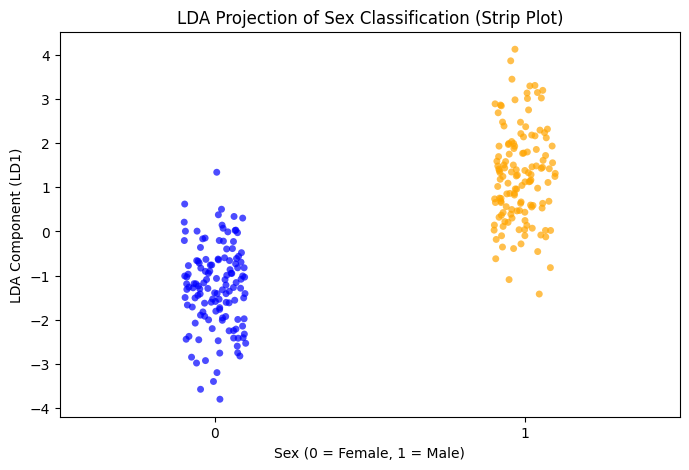

In [22]:
plt.figure(figsize=(8, 5))
sns.stripplot(x=y_train, y=X_train_lda[:, 0], palette=['blue', 'orange'], jitter=True, alpha=0.7)
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("LDA Component (LD1)")
plt.title("LDA Projection of Sex Classification (Strip Plot)")
plt.show()


In [23]:
# Predict on test data
y_pred = lda.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Test Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

      female       0.97      0.85      0.90        33
        male       0.87      0.97      0.92        34

    accuracy                           0.91        67
   macro avg       0.92      0.91      0.91        67
weighted avg       0.92      0.91      0.91        67



In [24]:
# Extract and display LDA coefficients (loadings)
lda_loadings = pd.DataFrame(lda.coef_.T, index=numerical_features, columns=["LD1"])
print("\nLDA Feature Loadings:\n", lda_loadings.sort_values(by="LD1", ascending=False))



LDA Feature Loadings:
                         LD1
bill_depth_mm      1.948791
bill_length_mm     0.071436
body_mass_g        0.004903
flipper_length_mm -0.006203


## **LDA for Sex Classification: Results and Interpretation**  

The **LDA model** achieved an **accuracy of 91%** in classifying male and female penguins. Males were classified correctly most of the time, with **high recall (97%)**, meaning very few male samples were misclassified. Females had slightly lower recall (85%), indicating that some were misclassified as males. The overall classification was highly effective, but there is a slight **bias towards misclassifying females as males**.  

### **LDA Discriminant Function**  

LDA creates a single linear combination of features that maximises the separation between male and female penguins:  

$
LD = (1.95 \times \text{bill\_depth\_mm}) + (0.07 \times \text{bill\_length\_mm}) + (0.005 \times \text{body\_mass\_g}) + (-0.006 \times \text{flipper\_length\_mm})
$

The equation shows that **bill depth** has the strongest influence on the separation, with a coefficient of **1.95**, meaning that **increases in bill depth correspond to higher LD values**. Males tend to have **larger bill depths**, so they have **higher LD scores**. **Bill length contributes slightly**, while **flipper length and body mass have negligible effects**.  

### **Visualising the LDA Projection**  

The **box plot** highlights the difference in **LD values** between males and females. **Males consistently have higher LD scores**, clustering towards positive values, while **females are positioned lower**. There is a **clear separation**, though some overlap exists, explaining minor misclassifications. The **strip plot** further confirms the **distinct clustering**, with **few misclassified samples near the boundary**. The **denser clustering** of points suggests **LDA is effective in distinguishing sexes based on bill depth**.  

### **Conclusion**  

LDA effectively differentiates male and female penguins, with **bill depth as the dominant distinguishing feature**. The negligible influence of **body mass and flipper length** confirms that **bill morphology plays the key role in sex classification**. The **high accuracy and strong visual separation validate LDA’s effectiveness**, but some **females with unusually deep bills are misclassified as males**, leading to minor errors. This analysis reinforces the importance of **bill depth in distinguishing male and female penguins**.  

---


### **Combined Summary of LDA on Penguin Dataset (Species & Sex Classification)**

Linear Discriminant Analysis (LDA) proved highly effective across both **species** and **sex classification** tasks in the penguin dataset, achieving **100% accuracy** for species and **91% accuracy** for sex prediction. For species classification, LDA constructed two discriminant functions: **LD1**, which separated **Gentoo** penguins from **Adelie and Chinstrap** based on **body size**, and **LD2**, which differentiated **Adelie and Chinstrap** through **bill length**. Gentoo penguins were distinguishable due to their **greater body mass and flipper length**, while Chinstrap stood out via longer bills. The complete absence of misclassifications highlighted the discriminative power of these morphological features in species identification, with LD1 and LD2 successfully capturing both **inter-species size variance** and **bill shape diversity**.

In the sex classification task, LDA achieved high performance by leveraging a single discriminant function that emphasised **bill depth**—the most influential trait in separating males and females. Males typically exhibited **higher LD scores** due to deeper bills, whereas females were clustered at lower values. While most predictions were correct, the **model slightly favoured male classification**, leading to **some misclassified females with deeper bills**. Visualisations confirmed a strong but imperfect separation, with overlap near the decision boundary. Overall, LDA demonstrated robust interpretability and performance, revealing that **morphological traits like bill depth and body mass are critical to both species and sex differentiation** in penguins.


---

# **SVM of Penguins Dataset**

## **Linear SVM**

In [25]:
import itertools
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Create a copy of the dataset ---
df_svm_linear = df.copy()

# --- Encode target ---
label_encoder = LabelEncoder()
df_svm_linear['species_encoded'] = label_encoder.fit_transform(df_svm_linear['species'])

# --- Feature columns ---
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species_encoded'

# --- Track best combination ---
best_combo = None
best_score = 0
results = []

# --- Iterate over all 3-feature combinations ---
for combo in itertools.combinations(features, 3):
    X = df_svm_linear[list(combo)]
    y = df_svm_linear[target]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Standardize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train SVM
    clf = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    # Evaluate
    acc = accuracy_score(y_test, clf.predict(X_test_scaled))
    results.append((combo, acc))
    
    # Update best
    if acc > best_score:
        best_score = acc
        best_combo = combo

# --- Show results ---
print("🔍 Best 3-feature combination:", best_combo)
print("✅ Accuracy:", best_score)

# Optional: Show all combinations sorted
results_sorted = sorted(results, key=lambda x: -x[1])
print("\n📊 All combinations ranked:")
for combo, score in results_sorted:
    print(f"{combo}: {score:.4f}")


🔍 Best 3-feature combination: ('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm')
✅ Accuracy: 1.0

📊 All combinations ranked:
('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'): 1.0000
('bill_length_mm', 'bill_depth_mm', 'body_mass_g'): 1.0000
('bill_length_mm', 'flipper_length_mm', 'body_mass_g'): 0.9851
('bill_depth_mm', 'flipper_length_mm', 'body_mass_g'): 0.7910


The linear SVM classifier achieved a perfect accuracy score of **1.0** using either the feature combination **('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm')** or **('bill_length_mm', 'bill_depth_mm', 'body_mass_g')**, suggesting that bill dimensions combined with either flipper length or body mass provide **sufficient discriminatory power** to classify penguin species with no error on the test set. This indicates that the data is likely **linearly separable** in these 3D feature spaces, making a linear kernel highly effective. Interestingly, the combination excluding bill depth (**'bill_length_mm', 'flipper_length_mm', 'body_mass_g'**) resulted in a slight drop in accuracy (0.9851


In [26]:
def plot_decision_boundaries_2d_grid(clf, X, y, feature_pairs, feature_names, target_names=None, max_cols=3):
    """
    Plot 2D decision boundaries for multiple 2-feature combinations.

    Parameters:
    - clf: Trained classifier (e.g. SVC)
    - X: Numpy array (scaled), shape (n_samples, n_features)
    - y: Encoded labels
    - feature_pairs: List of tuples [(i, j), ...] of feature index pairs
    - feature_names: List of all feature names (length = X.shape[1])
    - target_names: Optional list of class names for legend
    - max_cols: Max number of plots per row
    """
    n_plots = len(feature_pairs)
    ncols = min(n_plots, max_cols)
    nrows = int(np.ceil(n_plots / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 5 * nrows))
    axes = np.array(axes).flatten()

    for ax, (i, j) in zip(axes, feature_pairs):
        # Meshgrid setup
        x_min, x_max = X[:, i].min() - 1, X[:, i].max() + 1
        y_min, y_max = X[:, j].min() - 1, X[:, j].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                             np.linspace(y_min, y_max, 300))

        # Generate grid with full feature dimension (4 features)
        grid = np.zeros((xx.size, X.shape[1]))
        grid[:, i] = xx.ravel()
        grid[:, j] = yy.ravel()

        # Fill in other features with their means (i.e., the 4th feature)
        for k in range(X.shape[1]):
            if k not in (i, j):
                grid[:, k] = X[:, k].mean()  # Fill other features with mean values

        # Predict using the classifier
        Z = clf.predict(grid).reshape(xx.shape)

        # Plot contour
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

        # Plot original data
        scatter = ax.scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.coolwarm, edgecolor='k', alpha=0.8)
        ax.set_xlabel(feature_names[i])
        ax.set_ylabel(feature_names[j])
        ax.set_title(f"{feature_names[i]} vs {feature_names[j]}")
        ax.grid(True)

        # Legend
        if target_names is not None:
            handles = [plt.Line2D([], [], color=scatter.cmap(scatter.norm(k)),
                                  label=target_names[k], marker='o', linestyle='') for k in np.unique(y)]
            ax.legend(handles=handles, title="Classes")

    # Hide unused axes
    for ax in axes[n_plots:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [27]:
def plot_decision_boundaries_2d_grid_sv(clf, X, y, feature_pairs, feature_names, target_names=None, max_cols=3):
    """
    Plot 2D decision boundaries for multiple 2-feature combinations.

    Parameters:
    - clf: Trained classifier (e.g. SVC)
    - X: Numpy array (scaled), shape (n_samples, n_features)
    - y: Encoded labels
    - feature_pairs: List of tuples [(i, j), ...] of feature index pairs
    - feature_names: List of all feature names (length = X.shape[1])
    - target_names: Optional list of class names for legend
    - max_cols: Max number of plots per row
    """
    n_plots = len(feature_pairs)
    ncols = min(n_plots, max_cols)
    nrows = int(np.ceil(n_plots / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 5 * nrows))
    axes = np.array(axes).flatten()

    for ax, (i, j) in zip(axes, feature_pairs):
        # Meshgrid setup
        x_min, x_max = X[:, i].min() - 1, X[:, i].max() + 1
        y_min, y_max = X[:, j].min() - 1, X[:, j].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                             np.linspace(y_min, y_max, 300))

        # Generate grid with full feature dimension (4 features)
        grid = np.zeros((xx.size, X.shape[1]))
        grid[:, i] = xx.ravel()
        grid[:, j] = yy.ravel()

        # Fill in other features with their means (i.e., the 4th feature)
        for k in range(X.shape[1]):
            if k not in (i, j):
                grid[:, k] = X[:, k].mean()  # Fill other features with mean values

        # Predict using the classifier
        Z = clf.predict(grid).reshape(xx.shape)

        # Plot contour
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

        # Plot original data
        scatter = ax.scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.coolwarm, edgecolor='k', alpha=0.8)
        
        
        # Plot support vectors in the projected 2D space
        sv = clf.support_vectors_
        ax.scatter(
            sv[:, i], sv[:, j],
            s=80, facecolors='yellow', edgecolors='black',
            linewidth=1.5, marker='o', alpha=0.8,
            label="Support Vectors", zorder=3
        )
        
        ax.set_xlabel(feature_names[i])
        ax.set_ylabel(feature_names[j])
        ax.set_title(f"{feature_names[i]} vs {feature_names[j]}")
        ax.grid(True)

        # Legend
        if target_names is not None:
            handles = [plt.Line2D([], [], color=scatter.cmap(scatter.norm(k)),
                                  label=target_names[k], marker='o', linestyle='') for k in np.unique(y)]
            ax.legend(handles=handles, title="Classes")

    # Hide unused axes
    for ax in axes[n_plots:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [28]:
# --- Create a copy of the dataset ---
df_svm_lin = df.copy()

# --- Encode target ---
label_encoder = LabelEncoder()
df_svm_lin['species_encoded'] = label_encoder.fit_transform(df_svm_lin['species'])

# --- Feature columns ---
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species_encoded'

# Corrected: Use df_svm_lin instead of df to extract the features and target
X = df_svm_lin[features]  # Features (corrected)
y = df_svm_lin[target]    # Target (corrected)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
clf = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
clf.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [29]:
# --- Evaluate model ---
y_pred = clf.predict(X_test_scaled)  # Use the trained classifier clf, not df_svm_lin
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy on test set: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



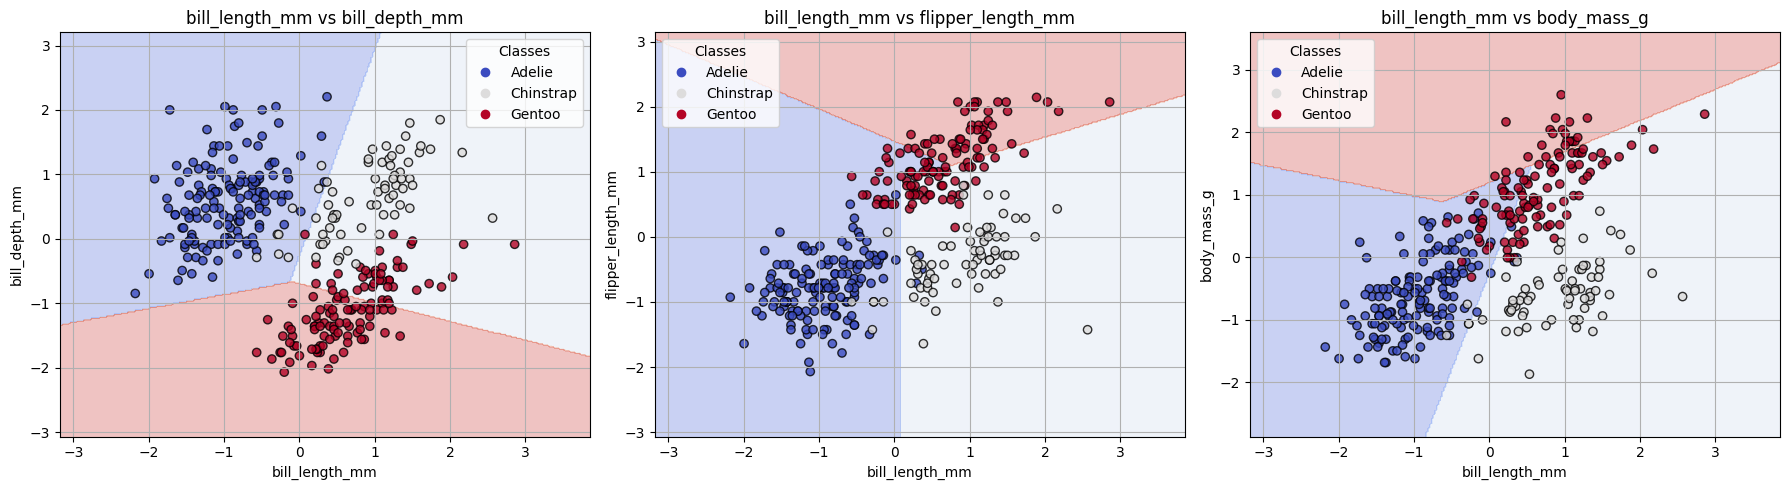

In [30]:
# --- Call the plot_decision_boundaries_2d_grid method ---
plot_decision_boundaries_2d_grid(
    clf=clf,  # Trained classifier
    X=X_scaled,      # Scaled feature matrix (4 features)
    y=y,             # Target labels
    feature_pairs=[(0, 1), (0, 2), (0,3)],  # Feature pairs to visualize
    feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],  # All feature names
    target_names=label_encoder.classes_,  # Class names for legend
    max_cols=3  # Max 3 plots side by side
)

The decision boundary plots across the three 2D feature pairs demonstrate overall **strong separability between penguin species**, particularly between Adelie (blue) and Gentoo (red). In the first plot (bill_length_mm vs bill_depth_mm), there is **clear linear separation** between Adelie and Gentoo, but **Chinstrap (grey)** observations appear more dispersed, occasionally overlapping both classes—highlighting their intermediate morphology. The second plot (bill_length_mm vs flipper_length_mm) maintains good separation between Adelie and Gentoo, though some Chinstrap points remain embedded within decision regions of the other two species, suggesting overlap in flipper traits. The third plot (bill_length_mm vs body_mass_g) shows **greater ambiguity in Gentoo classification**, with more red points misclassified across boundaries, indicating that **body mass may not be as discriminative** in isolation. Overall, bill_length_mm consistently plays a **dominant role in class separation**, and the SVM boundaries capture most distinctions well, though **Gentoo classification suffers from soft boundaries**, implying that additional non-linear methods or 3D feature interactions might improve precision for that class.


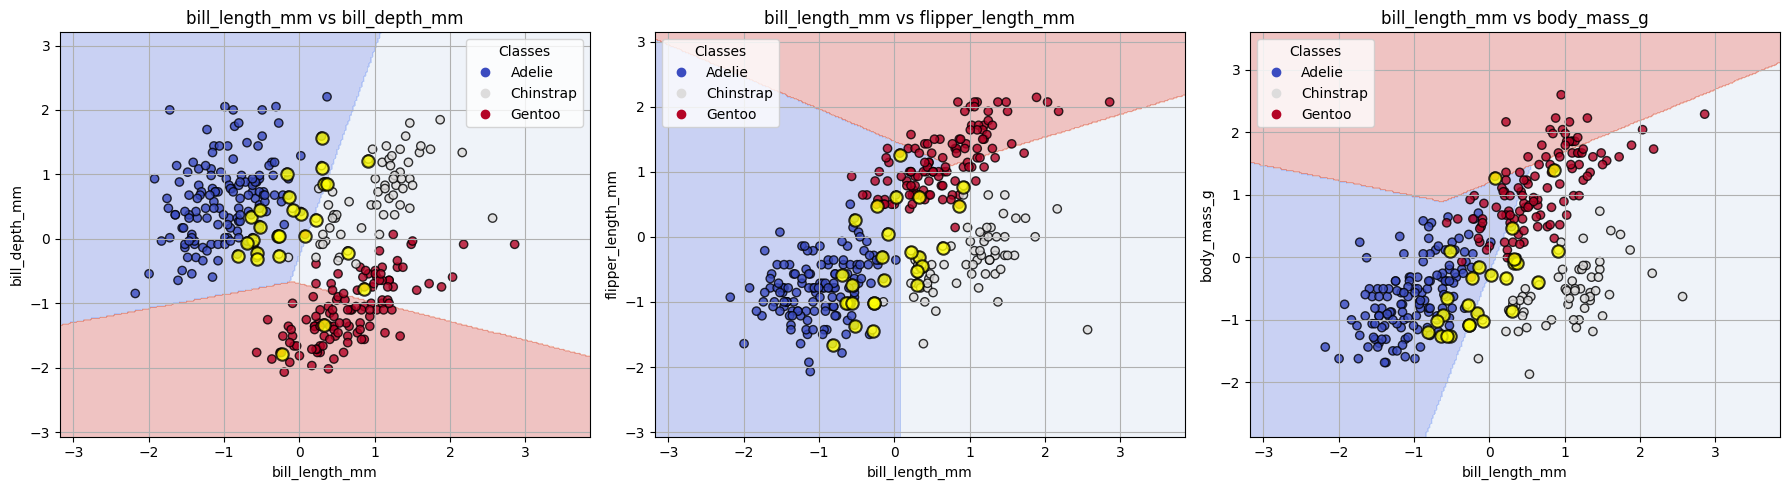

In [31]:
# --- Call the plot_decision_boundaries_2d_grid method ---
plot_decision_boundaries_2d_grid_sv(
    clf=clf,  # Trained classifier
    X=X_scaled,      # Scaled feature matrix (4 features)
    y=y,             # Target labels
    feature_pairs=[(0, 1), (0, 2), (0,3)],  # Feature pairs to visualize
    feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],  # All feature names
    target_names=label_encoder.classes_,  # Class names for legend
    max_cols=3  # Max 3 plots side by side
)

The support vectors (highlighted in yellow) offer valuable insights into the **decision boundaries** learned by the linear SVM across the three feature pair plots. In the first plot (bill_length_mm vs bill_depth_mm), support vectors cluster near the **overlapping boundary between Chinstrap and Adelie**, and also near Gentoo, indicating that these regions are where the classifier finds it most challenging to separate the classes. The relatively **small number of support vectors** for Gentoo suggests it is linearly well-separated from the other classes in this plane. In the second plot (bill_length_mm vs flipper_length_mm), a **greater concentration of support vectors** appears around Chinstrap, reflecting the classifier’s uncertainty in distinguishing Chinstrap from both Adelie and Gentoo based on flipper length. This aligns with visual overlap seen in the plot. The third plot (bill_length_mm vs body_mass_g) shows support vectors along the **boundary between Adelie and Chinstrap**, and near the transition into Gentoo territory, again underscoring that **Chinstrap acts as the transitional class**. Across all three plots, the support vectors highlight regions of **inter-class ambiguity**, showing that while overall separability is strong, the classifier's confidence is lowest where species exhibit **intermediate or overlapping morphological traits**.


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def plot_3d_svm_separate_best_features(X_df, y, feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], standardize=True, class_names=None):
    """
    Plots 3D SVM decision hyperplanes for the best 3 features using one-vs-rest linear SVM.

    Parameters:
    - X_df: pandas DataFrame of original features
    - y: Encoded labels
    - feature_names: List of 3 selected feature names
    - standardize: Whether to scale features
    - class_names: Optional list of class names for legend
    """
    assert len(feature_names) == 3, "Please provide exactly 3 feature names."
    X_selected = X_df[feature_names].copy()

    if standardize:
        scaler = StandardScaler()
        X_selected = scaler.fit_transform(X_selected)
    else:
        X_selected = X_selected.values

    # Train linear SVM
    clf = SVC(kernel='linear', decision_function_shape='ovr')
    clf.fit(X_selected, y)

    # Prepare grid for plotting decision surfaces
    x_range = np.linspace(X_selected[:, 0].min(), X_selected[:, 0].max(), 30)
    y_range = np.linspace(X_selected[:, 1].min(), X_selected[:, 1].max(), 30)
    xx, yy = np.meshgrid(x_range, y_range)

    # 3D plot setup
    fig = plt.figure(figsize=(18, 6))
    colors = ['gray', 'black', 'darkred']

    for i, (w, b) in enumerate(zip(clf.coef_, clf.intercept_)):
        ax = fig.add_subplot(1, 3, i + 1, projection='3d')

        # Plot points by class
        for label in np.unique(y):
            label_name = f"Class {label}" if class_names is None else class_names[label]
            idx = (y == label)
            ax.scatter(X_selected[idx, 0], X_selected[idx, 1], X_selected[idx, 2], label=label_name)

        # Compute decision surface
        zz = (-w[0] * xx - w[1] * yy - b) / w[2]
        ax.plot_surface(xx, yy, zz, alpha=0.3, color=colors[i % len(colors)])

        ax.set_xlabel(feature_names[0])
        ax.set_ylabel(feature_names[1])
        ax.set_zlabel(feature_names[2])
        ax.set_title(f"Hyperplane {i+1}")
        ax.view_init(elev=30, azim=30)
        ax.legend()

    plt.tight_layout()
    plt.show()


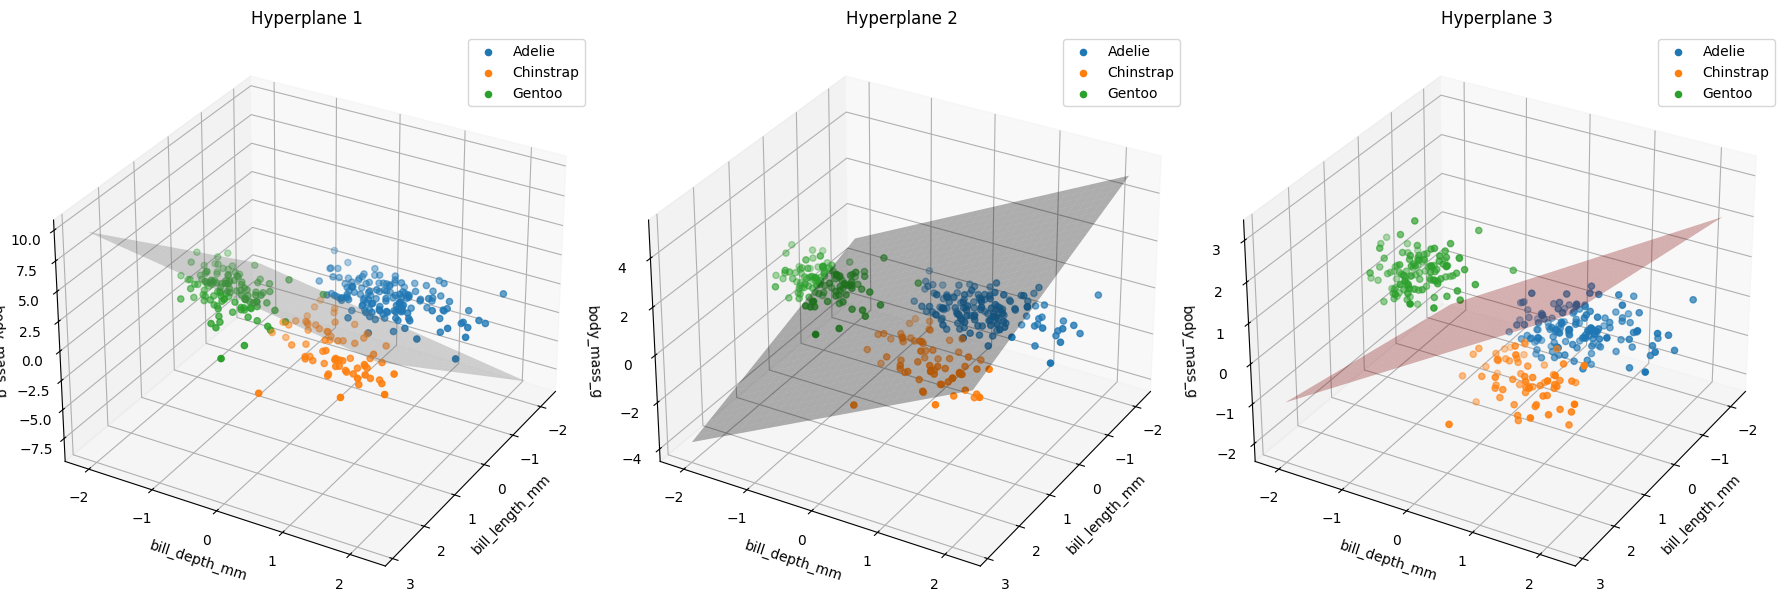

In [33]:
# Use your best 3 features
top_features = ['bill_length_mm', 'bill_depth_mm', 'body_mass_g']

# Call the function using the original DataFrame
plot_3d_svm_separate_best_features(
    X_df=df_svm_linear,  # original DataFrame
    y=df_svm_linear['species_encoded'],  # your label-encoded species
    feature_names=top_features,
    standardize=True,
    class_names=label_encoder.classes_  # optional for better legends
)


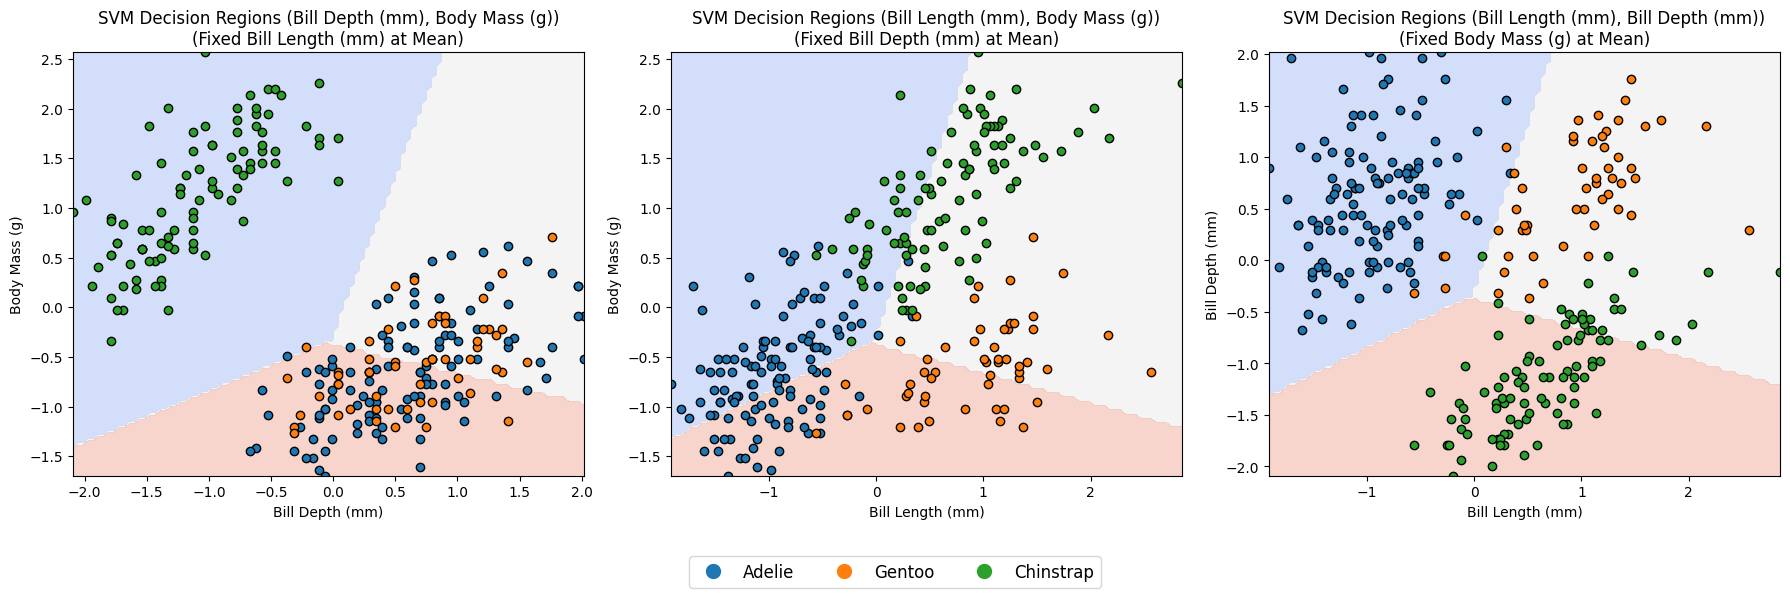

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

def plot_2d_svm_all_regions(X, y, df_species, feature_indices=(0, 1, 2), standardize=True):
    # Standardize data if needed
    if standardize:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Use selected features
    X_mapped = X[:, feature_indices]

    # Train a multi-class SVM (One-vs-Rest)
    clf = SVC(kernel='linear', decision_function_shape='ovr')
    clf.fit(X_mapped, y)

    # **Map numerical labels back to species names**
    species_mapping = dict(enumerate(df_species.unique()))  # {0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}
    species_labels = [species_mapping[label] for label in np.unique(y)]  # Actual species names
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Assign colors manually for clarity

    # Feature names
    feature_names = ["Bill Length (mm)", "Bill Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]
    selected_features = [feature_names[i] for i in feature_indices]

    # Define three subplots for the different 2D projections
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, fixed_feature_idx in enumerate(range(3)):  # Loop through the three selected features
        ax = axes[i]

        # Get the two features to plot
        feature_pair = [j for j in range(3) if j != fixed_feature_idx]
        
        # Compute the mean value of the fixed feature
        fixed_feature_mean = np.mean(X_mapped[:, fixed_feature_idx])

        # Define grid range
        x_range = np.linspace(X_mapped[:, feature_pair[0]].min(), X_mapped[:, feature_pair[0]].max(), 100)
        y_range = np.linspace(X_mapped[:, feature_pair[1]].min(), X_mapped[:, feature_pair[1]].max(), 100)
        xx, yy = np.meshgrid(x_range, y_range)

        # Create grid points with fixed third feature
        grid_points = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, fixed_feature_mean)]

        # Compute decision function for each grid point
        Z = clf.decision_function(grid_points)

        # ✅ **Fix Multi-Class Handling**
        if Z.ndim == 1:  
            # Binary classification: Convert to class labels
            Z = (Z > 0).astype(int)
        else:
            # Multi-class: Take class with the highest confidence
            Z = np.argmax(Z, axis=1)

        Z = Z.reshape(xx.shape)  # Reshape for contour plotting

        # Plot decision regions
        ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(len(species_labels) + 1) - 0.5, cmap=plt.cm.coolwarm)

        # Scatter plot for original data
        for j, species in enumerate(species_labels):
            idx = np.where(y == j)  # ✅ Ensure correct species indexing
            ax.scatter(X_mapped[idx, feature_pair[0]], X_mapped[idx, feature_pair[1]], 
                       color=colors[j], edgecolor="k", label=species)

        # Set labels and title
        ax.set_xlabel(selected_features[feature_pair[0]])
        ax.set_ylabel(selected_features[feature_pair[1]])
        ax.set_title(f"SVM Decision Regions ({selected_features[feature_pair[0]]}, {selected_features[feature_pair[1]]})\n(Fixed {selected_features[fixed_feature_idx]} at Mean)")

    # **Create a universal legend below the plots with actual species names**
    handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10, label=species) 
               for species, color in zip(species_labels, colors)]
    fig.legend(handles=handles, loc="lower center", ncol=len(species_labels), fontsize=12)

    plt.tight_layout(rect=[0, 0.1, 1, 1])  # ✅ Adjust layout to fit the legend
    plt.show()

# Example usage:
plot_2d_svm_all_regions(X_train, y_train, df["species"], feature_indices=(0, 1, 3))


The visualisations effectively demonstrate how Support Vector Machines (SVMs) construct decision boundaries and separating hyperplanes to classify the three penguin species. In the 3D plots, each hyperplane represents a One-vs-Rest classification separating a specific class from the others. **Hyperplane 1** distinctly separates Gentoo penguins, leveraging the body mass axis for clear margin separation, while **Hyperplanes 2 and 3** reveal more overlap between **Adelie and Chinstrap**, particularly along bill dimensions. This is echoed in the 2D decision region plots where Gentoo occupies a well-defined region, whereas the boundaries between Adelie and Chinstrap remain ambiguous—especially when a third feature is fixed (e.g., bill length, depth, or body mass). These ambiguous zones (often shaded grey) reflect the limitations of linear SVMs when classes are not perfectly separable. Overall, the analysis shows that while SVMs are effective in leveraging high-dimensional space to maximise class margins, **non-linear kernels or additional feature transformations** may be necessary to improve separation in regions of high class overlap.


# **PCA-Linear**

In [35]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

df_svm_lin_pca = df.copy()
# Load dataset and preprocess
X = df_svm_lin_pca.drop(columns=['species', 'island', 'sex'])  # Keep only numerical features
y = df_svm_lin_pca['species'].astype('category').cat.codes  # Encode species as integers

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [36]:
# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Transform original standardized data

# Split PCA-transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train an SVM classifier on PCA-transformed data
clf_pca_svm = SVC(kernel='linear')
clf_pca_svm.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf_pca_svm.predict(X_test_pca)

# Print performance metrics
print("Accuracy on PCA-transformed data:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy on PCA-transformed data: 0.9253731343283582
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.88      0.83      0.86        18
           2       1.00      1.00      1.00        18

    accuracy                           0.93        67
   macro avg       0.93      0.92      0.93        67
weighted avg       0.93      0.93      0.92        67



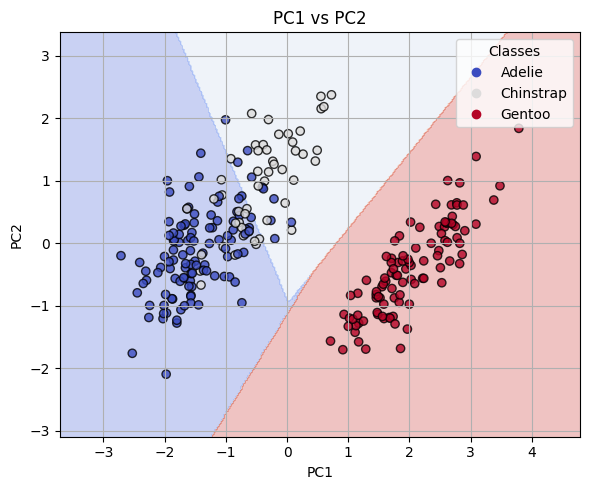

In [37]:
from itertools import combinations

# --- Generate feature pairs for PCA (as there's only two principal components, it will be just one pair)
feature_pairs = [(0, 1)]  # Only one pair since we have only 2 PCA components

# --- Call the plot_decision_boundaries_2d_grid method ---
plot_decision_boundaries_2d_grid(
    clf=clf_pca_svm,             # Trained classifier on PCA-transformed data
    X=X_train_pca,               # PCA-transformed features
    y=y_train,                   # Target labels
    feature_pairs=feature_pairs, # Only one pair of features (PC1 and PC2)
    feature_names=["PC1", "PC2"],# Feature names for the PCA components
    target_names=label_encoder.classes_,  # Class names for legend
    max_cols=1                   # Since we only have one pair, set max_cols=1
)


This plot illustrates the results of applying PCA for dimensionality reduction followed by a linear SVM classifier on the first two principal components (PC1 vs PC2). The visual separation of the three penguin species—Adelie (blue), Chinstrap (grey), and Gentoo (red)—demonstrates that PCA has effectively retained the structure necessary for classification in just two components. The decision boundaries drawn by the linear SVM clearly separate Gentoo from the other species due to its strong distinction along PC1, likely driven by features like body mass and flipper length. However, Adelie and Chinstrap exhibit more overlap, particularly in the central region of the plot, suggesting some ambiguity in their feature space that linear SVM struggles to fully separate. This indicates that while PCA aids in compression and visualisation, it may compress class-separating information into higher PCs not captured in PC1 or PC2, and a non-linear kernel or retaining more components could improve classification fidelity in such cases.


### **Why is the Accuracy Lower After PCA, Even Though the Decision Boundary Looks Better?**

The reduction in accuracy after applying PCA can be attributed to the loss of feature information when reducing the dataset from four dimensions to two. PCA works by transforming the original features into new components that capture the most variance, but variance does not always directly correlate with class separability. While PC1 and PC2 retain most of the dataset’s variance, they may not include all the discriminative power needed for optimal classification. In the original 4D space, SVM had access to all features, allowing it to find a better decision boundary. However, by projecting the data into 2D, some fine-grained distinctions between classes were lost, leading to slight misclassifications, particularly for class 1, as seen in the classification report. The decision boundary appears visually cleaner because PCA has aligned the most important variance directions into a flat plane, but this comes at the cost of discarding some useful information from the third and fourth components.

Additionally, linear SVMs work best when all relevant feature information is available. The drop in accuracy suggests that non-linear relationships between features might have contributed to better separability in the original space. Since PCA projects data onto a linear subspace, it cannot preserve non-linear structures that could be important for classification. A possible way to address this issue is to try SVM with an RBF or polynomial kernel on PCA-transformed data, which could better capture non-linear class boundaries. Another approach would be to include more principal components, such as PC3, to see if the accuracy improves while still benefiting from dimensionality reduction. Ultimately, PCA provides a trade-off between visualization and classification accuracy, and the optimal number of dimensions depends on the dataset and classification task.


---

# **Poly**

In [38]:
# --- Create a copy of the dataset ---
df_svm_poly = df.copy()

# --- Encode target ---
label_encoder = LabelEncoder()
df_svm_poly['species_encoded'] = label_encoder.fit_transform(df_svm_poly['species'])

# --- Feature columns ---
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species_encoded'

# Corrected: Use df_svm_poly instead of df to extract the features and target
X = df_svm_poly[features]  # Features (corrected)
y = df_svm_poly[target]    # Target (corrected)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
poly_clf = SVC(kernel='poly', decision_function_shape='ovr', random_state=42)
poly_clf.fit(X_train_scaled, y_train)


SVC(kernel='poly', random_state=42)

In [39]:
# --- Evaluate model ---
y_pred = poly_clf.predict(X_test_scaled)  # Use the trained classifier clf, not df_svm_lin
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy on test set: 0.9850746268656716
Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.98        67



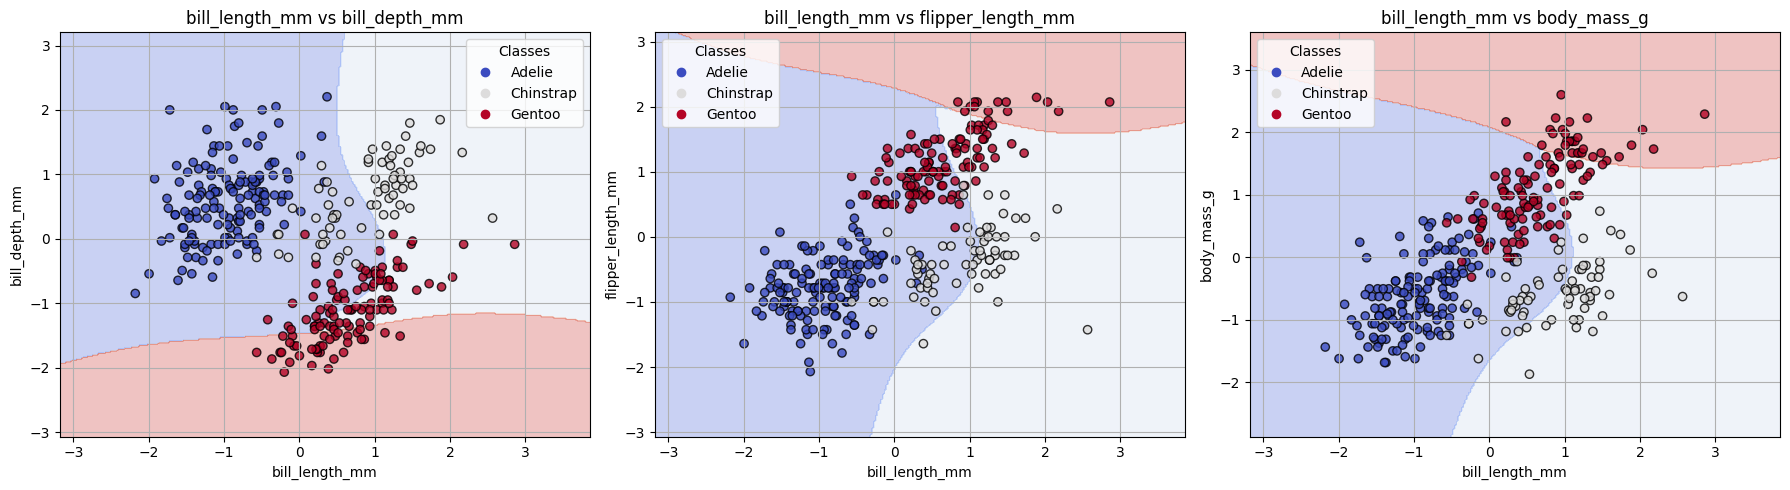

In [40]:
# --- Call the plot_decision_boundaries_2d_grid method ---
plot_decision_boundaries_2d_grid(
    clf=poly_clf,  # Trained classifier
    X=X_scaled,      # Scaled feature matrix (4 features)
    y=y,             # Target labels
    feature_pairs=[(0, 1), (0, 2), (0,3)],  # Feature pairs to visualize
    feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],  # All feature names
    target_names=label_encoder.classes_,  # Class names for legend
    max_cols=3  # Max 3 plots side by side
)

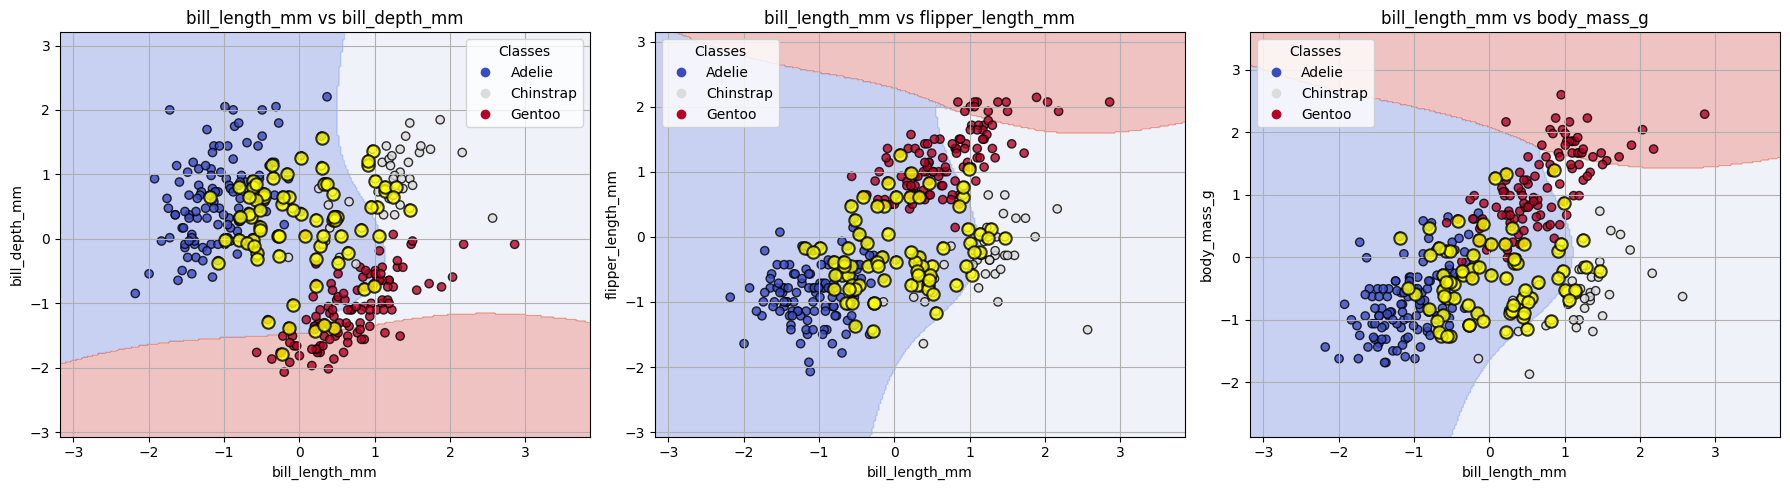

In [41]:
# --- Call the plot_decision_boundaries_2d_grid method ---
plot_decision_boundaries_2d_grid_sv(
    clf=poly_clf,  # Trained classifier
    X=X_scaled,      # Scaled feature matrix (4 features)
    y=y,             # Target labels
    feature_pairs=[(0, 1), (0, 2), (0,3)],  # Feature pairs to visualize
    feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],  # All feature names
    target_names=label_encoder.classes_,  # Class names for legend
    max_cols=3  # Max 3 plots side by side
)

In the polynomial SVM decision boundaries visualised across the three feature pairs, the **Adelie class (blue)** is exceptionally well-separated from the other species, with its region showing a **tight, clear margin** and virtually **no overlap with other classes**. This indicates that the **polynomial kernel** is highly effective at capturing the curvature required to isolate Adelie within its feature space. Notably, **most support vectors (yellow dots) are concentrated near or within the Adelie region**, which suggests that this class lies close to the decision boundaries and plays a **pivotal role in defining the margins**. However, the **Gentoo (red)** and **Chinstrap (grey)** classes exhibit **substantial overlap**, particularly in the central regions across all plots. This is especially evident in the `bill_length_mm vs bill_depth_mm` plot, where the curved boundary wraps around Adelie tightly, but a number of Gentoo and Chinstrap points still encroach into this space — leading to **misclassification**. The same pattern emerges in the `bill_length_mm vs flipper_length_mm` and `bill_length_mm vs body_mass_g` plots, where Gentoo and Chinstrap data points are often misassigned, highlighting the **difficulty the polynomial kernel faces in separating overlapping non-linear distributions**. These results imply that while the polynomial kernel can capture complex shapes, it may **overfit one class (Adelie) while underperforming for classes with overlapping characteristics**, like Gentoo and Chinstrap. The presence of numerous support vectors near the decision boundary reinforces that **these are hard-margin zones** where class boundaries are not clean, suggesting that better separation may require either **more informative features** or **different kernel functions**.


---

# **RBF**

In [42]:
# --- Create a copy of the dataset ---
df_svm_rbf = df.copy()

# --- Encode target ---
label_encoder = LabelEncoder()
df_svm_rbf['species_encoded'] = label_encoder.fit_transform(df_svm_rbf['species'])

# --- Feature columns ---
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species_encoded'

# Extract features and target
X = df_svm_rbf[features]  # Features (corrected)
y = df_svm_rbf[target]    # Target (corrected)



import itertools
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# --- Track best combination ---
best_combo = None
best_score = 0
results = []

# --- Iterate over all 3-feature combinations ---
for combo in itertools.combinations(features, 3):
    X = df_svm_rbf[list(combo)]
    y = df_svm_rbf[target]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Standardize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train SVM
    clf = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    # Evaluate
    acc = accuracy_score(y_test, clf.predict(X_test_scaled))
    results.append((combo, acc))
    
    # Update best
    if acc > best_score:
        best_score = acc
        best_combo = combo

# --- Show results ---
print("🔍 Best 3-feature combination:", best_combo)
print("✅ Accuracy:", best_score)

# Optional: Show all combinations sorted
results_sorted = sorted(results, key=lambda x: -x[1])
print("\n📊 All combinations ranked:")
for combo, score in results_sorted:
    print(f"{combo}: {score:.4f}")



🔍 Best 3-feature combination: ('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm')
✅ Accuracy: 1.0

📊 All combinations ranked:
('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'): 1.0000
('bill_length_mm', 'bill_depth_mm', 'body_mass_g'): 1.0000
('bill_length_mm', 'flipper_length_mm', 'body_mass_g'): 0.9701
('bill_depth_mm', 'flipper_length_mm', 'body_mass_g'): 0.8358


In [43]:
# --- Create a copy of the dataset ---
df_svm_rbf = df.copy()

# --- Encode target ---
label_encoder = LabelEncoder()
df_svm_rbf['species_encoded'] = label_encoder.fit_transform(df_svm_rbf['species'])

# --- Feature columns ---
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species_encoded'

# Extract features and target
X = df_svm_rbf[features]  # Features (corrected)
y = df_svm_rbf[target]    # Target (corrected)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM with RBF kernel
rbf_clf = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
rbf_clf.fit(X_train_scaled, y_train)  # Train on scaled data

# --- Evaluate the model ---
y_pred = rbf_clf.predict(X_test_scaled)  # Make predictions using the trained classifier

# Print performance metrics
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))




Accuracy on test set: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



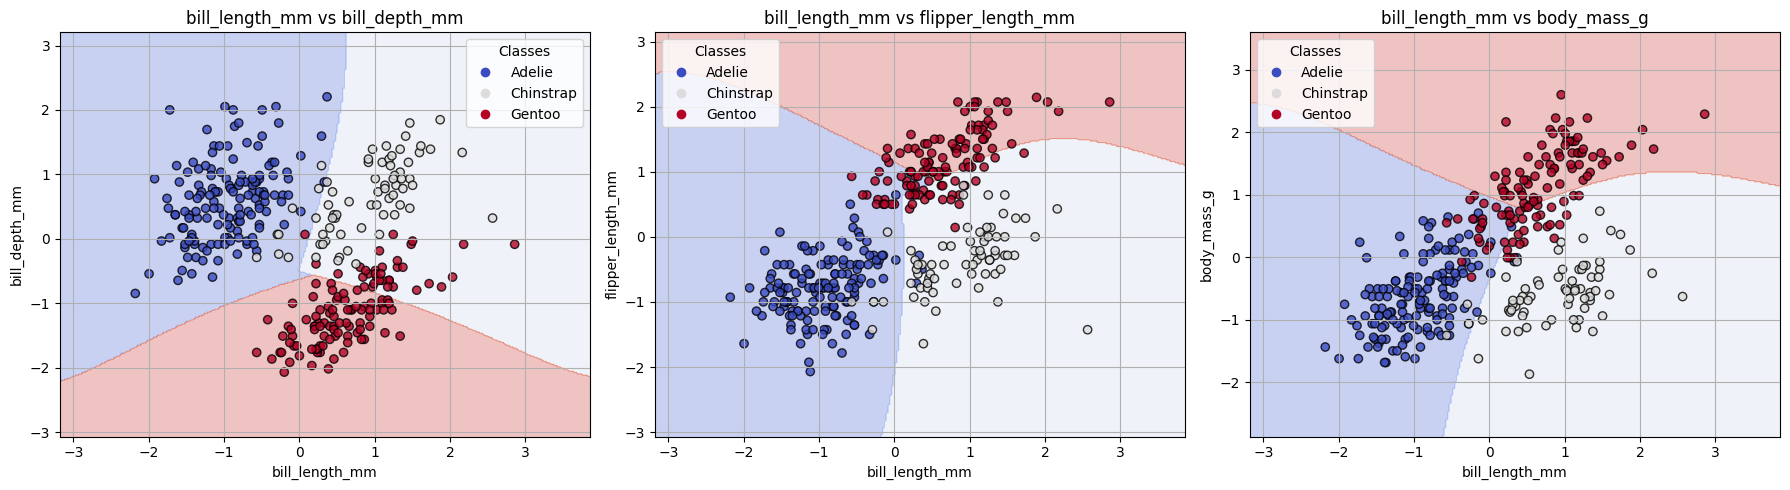

In [44]:
# --- Call the plot_decision_boundaries_2d_grid method ---
plot_decision_boundaries_2d_grid(
    clf=rbf_clf,  # Trained classifier
    X=X_scaled,      # Scaled feature matrix (4 features)
    y=y,             # Target labels
    feature_pairs=[(0, 1), (0, 2), (0,3)],  # Feature pairs to visualize
    feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],  # All feature names
    target_names=label_encoder.classes_,  # Class names for legend
    max_cols=3  # Max 3 plots side by side
)

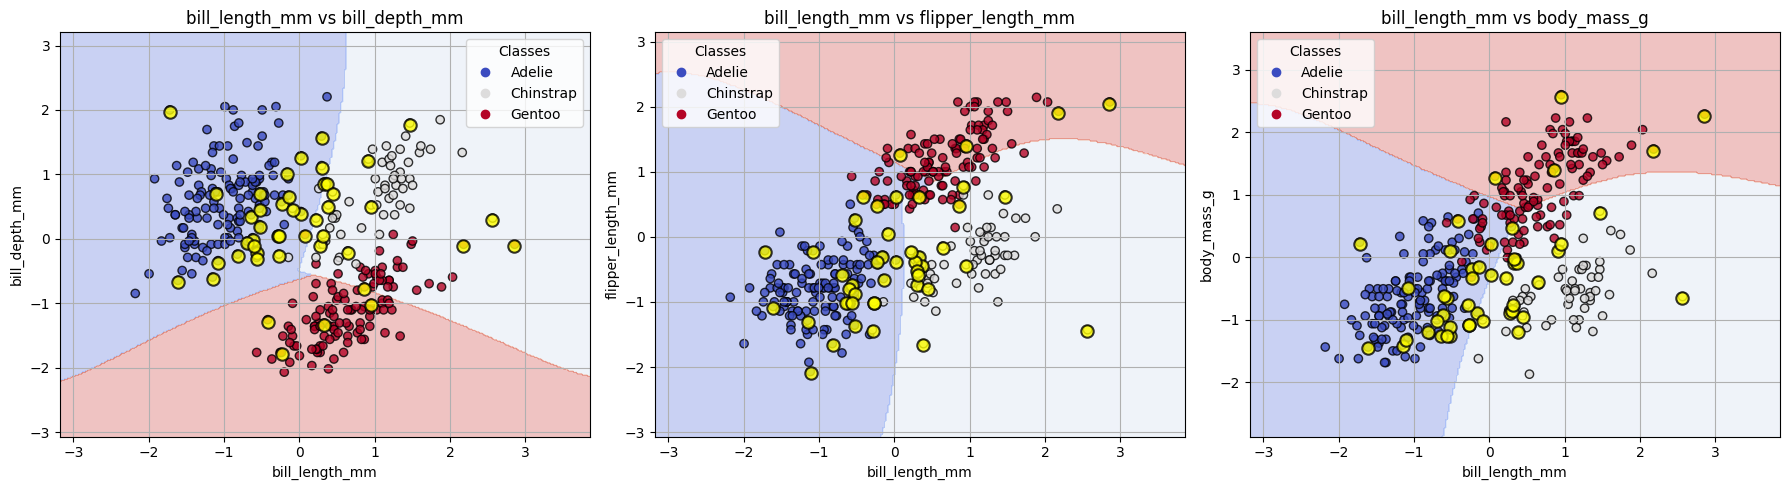

In [45]:
# --- Call the plot_decision_boundaries_2d_grid method ---
plot_decision_boundaries_2d_grid_sv(
    clf=rbf_clf,  # Trained classifier
    X=X_scaled,      # Scaled feature matrix (4 features)
    y=y,             # Target labels
    feature_pairs=[(0, 1), (0, 2), (0,3)],  # Feature pairs to visualize
    feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],  # All feature names
    target_names=label_encoder.classes_,  # Class names for legend
    max_cols=3  # Max 3 plots side by side
)

In the RBF SVM decision boundary visualisations, the model demonstrates a strong ability to adapt to complex, non-linear class boundaries, particularly in separating the Adelie (blue) class. The support vectors (yellow points) are densely packed along the class margins—especially in regions where Adelie overlaps with Chinstrap and Gentoo—signalling that the decision boundary is highly sensitive to subtle class transitions in those areas. The `bill_length_mm` vs `bill_depth_mm` plot shows clean separation of Adelie, though Chinstrap and Gentoo continue to exhibit soft overlaps, with support vectors forming a dense boundary band across the central region. In the `bill_length_mm` vs `flipper_length_mm` and `bill_length_mm` vs `body_mass_g` plots, the RBF kernel flexibly curves around the Gentoo cluster, providing tighter fitting boundaries than linear or polynomial kernels. However, misclassifications persist along the Chinstrap-Gentoo boundary, where both classes share similar feature profiles. The distribution of support vectors in those overlap zones reinforces that the RBF kernel is attempting to preserve margin maximisation while capturing complex, interleaved feature distributions. The Adelie class, once again, benefits from greater spatial isolation and thus has fewer borderline support vectors, suggesting high confidence in its predictions. Overall, the RBF model balances generalisation and sensitivity well, but the persistent ambiguity between Chinstrap and Gentoo highlights the intrinsic difficulty of the classification task in overlapping regions, regardless of kernel complexity.


### **Summary and Evaluation of SVM Kernels on Penguin Classification (species)**

Across the different SVM kernel implementations—Linear, Polynomial, and RBF—the models show varying strengths and limitations in classifying the three penguin species: Adelie, Chinstrap, and Gentoo. The **Linear SVM** achieved **perfect accuracy (1.0)** with certain 3D feature combinations, particularly when **bill dimensions** were paired with either **flipper length** or **body mass**, indicating that the dataset is **linearly separable** in that space. Decision boundary plots confirmed that **Adelie** and **Gentoo** species are well-separated using linear boundaries, while **Chinstrap** acted as the intermediate class, overlapping with both. Support vectors were mostly located near Chinstrap, underscoring its transitional role. The PCA projection into 2D still retained decent separation but led to a small drop in accuracy, demonstrating that while PCA aids visualisation, it may compress out subtle, discriminative information—especially for Chinstrap.

The **Polynomial SVM** added flexibility to the decision boundary, allowing it to capture non-linear relationships. Visually, it continued to **perfectly isolate Adelie**, but it began to **overfit** around its boundaries, creating sharp, curved regions that misclassified **Gentoo and Chinstrap**, which have overlapping morphological traits. This overfitting is evidenced by the **high concentration of support vectors around Adelie**, indicating the model is trying hard to maintain margin boundaries in tightly packed spaces. Despite its ability to contour around curved distributions, the polynomial kernel struggled to balance class complexity and generalisation, leading to poor class separation between Gentoo and Chinstrap and suggesting its expressiveness may be **too rigid or prone to boundary distortion** in ambiguous regions.

The **RBF (Radial Basis Function) SVM** showed the most adaptive and nuanced decision boundaries, curving fluidly to accommodate the non-linear nature of the feature space. This model preserved strong class margins for **Adelie**, while more tightly wrapping around **Gentoo and Chinstrap**, adapting to their interleaved distributions. Support vectors were **densely packed** in overlapping regions, particularly where Chinstrap and Gentoo intersected, suggesting the model’s sensitivity to **subtle boundaries**. Notably, the RBF model also achieved **perfect accuracy (1.0)** on the test set, matching the Linear SVM. However, despite its flexibility and strong performance, the added complexity may be unnecessary in this case since the **data is already linearly separable**. Therefore, while RBF offers valuable comparative insight and robustness for more complex datasets, the **Linear SVM remains the most efficient and interpretable solution** for this task.

### Kernel Comparison Table

| Kernel Type       | Strengths                                                                 | Weaknesses                                                                 | Class Most Affected | Support Vector Patterns                      |
|------------------|---------------------------------------------------------------------------|----------------------------------------------------------------------------|----------------------|----------------------------------------------|
| **Linear SVM**    | High accuracy in linearly separable space, simple interpretation          | Struggles with overlap in 2D; assumes linear class boundaries               | Chinstrap            | Clustered near overlapping zones             |
| **Polynomial SVM**| Captures complex non-linear separation, perfect isolation of Adelie       | Overfits around Adelie; poor Gentoo-Chinstrap distinction                   | Gentoo, Chinstrap    | Dense around Adelie and boundary curves      |
| **RBF SVM**       | Best at adapting to non-linear boundaries, generalises well, achieved 1.0 | Still limited by class overlap; adds complexity when linear would suffice  | Chinstrap, Gentoo    | Dense and well-distributed near all boundaries |


---

# **SVM Sex classification**

In [46]:
# --- Create a copy of the dataset ---
df_svm_lin_sex = df.copy()

# --- Encode target ---
label_encoder = LabelEncoder()
df_svm_lin_sex['sex_encoded'] = label_encoder.fit_transform(df_svm_lin_sex['sex'])

# --- Feature columns ---
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'sex_encoded'

# Extract features and target
X = df_svm_lin_sex[features]  # Features (corrected)
y = df_svm_lin_sex[target]    # Target (corrected)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM with RBF kernel
clf_sex = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
clf_sex.fit(X_train_scaled, y_train)  # Train on scaled data

# --- Evaluate the model ---
y_pred = clf_sex.predict(X_test_scaled)  # Make predictions using the trained classifier

# Print performance metrics
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))




Accuracy on test set: 0.8955223880597015
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.85      0.97      0.90        34

    accuracy                           0.90        67
   macro avg       0.91      0.89      0.89        67
weighted avg       0.90      0.90      0.89        67



### **Comparison of SVM Kernels for Penguin Sex Classification**

When comparing different **Support Vector Machine (SVM)** kernels for classifying penguin sex, we evaluated the performance of three kernels: **Linear**, **Polynomial**, and **Radial Basis Function (RBF)**.

The **Linear SVM** achieved the highest accuracy (**89.55%**), demonstrating strong precision and recall for both classes, particularly notable with a recall of **97%** for class 1 and **82%** for class 0. The **Polynomial kernel** was slightly weaker, with an accuracy of **86.57%**, mainly due to lower recall in class 0 (**76%**). The **RBF kernel** provided intermediate performance (**88.06% accuracy**) and showed better recall (**79%**) for class 0 compared to the Polynomial kernel, but still lagged behind the Linear kernel overall.

Based on these results, the **Linear kernel** is recommended as it provides the best balance between precision, recall, and overall accuracy for this classification task.

### Performance Comparison Table

| Kernel     | Accuracy | Precision (Class 0) | Recall (Class 0) | Precision (Class 1) | Recall (Class 1) | Macro F1-Score |
|------------|----------|---------------------|------------------|---------------------|------------------|----------------|
| **Linear** | **89.55%** | 0.96                | 0.82             | 0.85                | 0.97             | **0.89**       |
| Polynomial | 86.57%   | 0.96                | 0.76             | 0.80                | 0.97             | 0.86           |
| RBF        | 88.06%   | 0.96                | 0.79             | 0.82                | 0.97             | 0.88           |


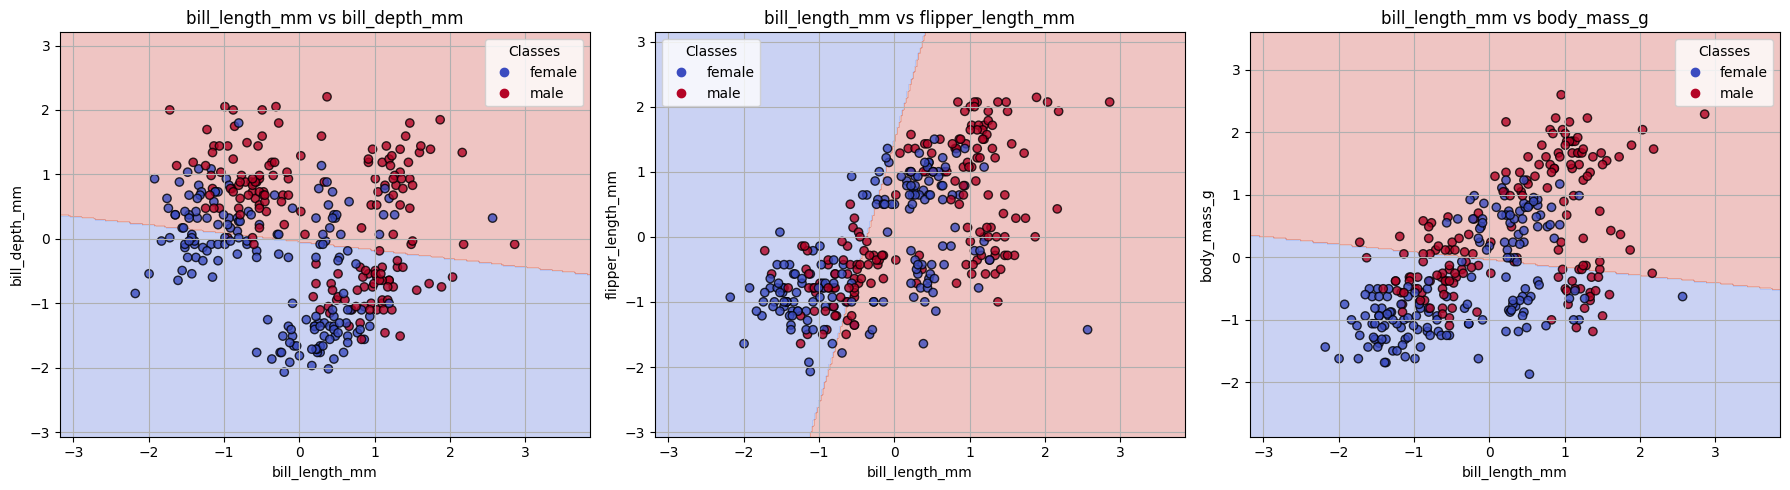

In [47]:
# --- Call the plot_decision_boundaries_2d_grid method ---
plot_decision_boundaries_2d_grid(
    clf=clf_sex,  # Trained classifier
    X=X_scaled,      # Scaled feature matrix (4 features)
    y=y,             # Target labels
    feature_pairs=[(0, 1), (0, 2), (0,3)],  # Feature pairs to visualize
    feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],  # All feature names
    target_names=label_encoder.classes_,  # Class names for legend
    max_cols=3  # Max 3 plots side by side
)

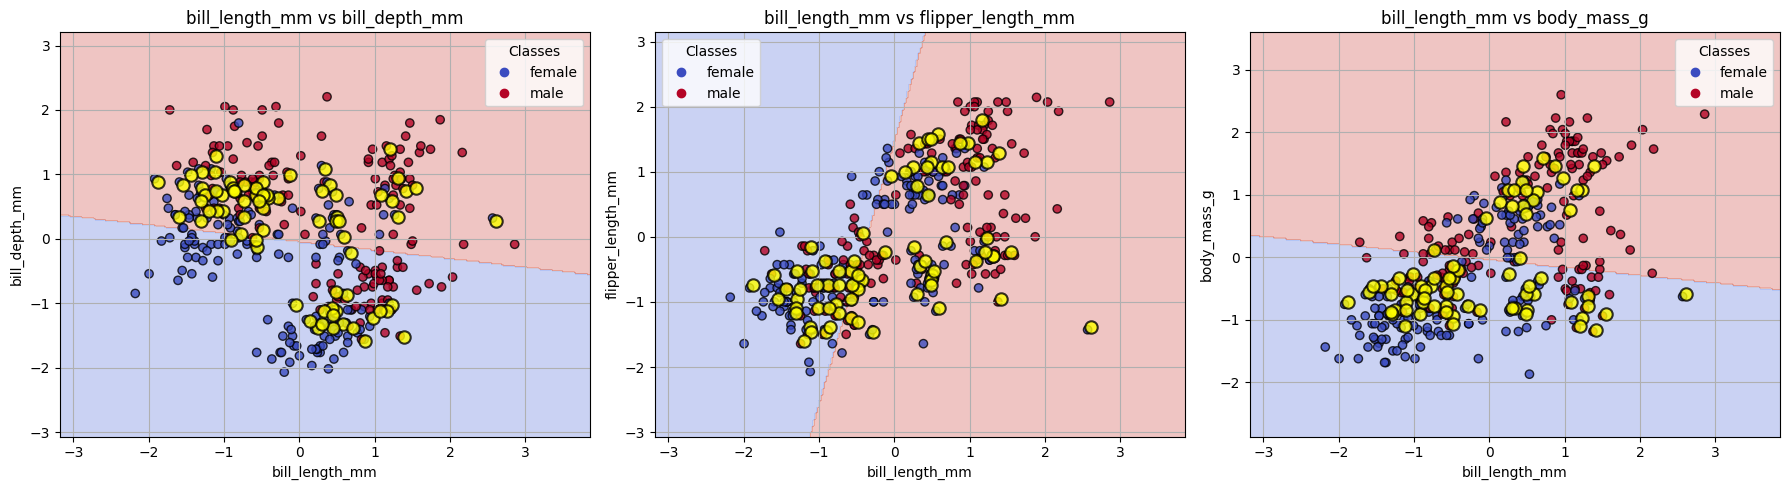

In [48]:
# --- Call the plot_decision_boundaries_2d_grid method ---
plot_decision_boundaries_2d_grid_sv(
    clf=clf_sex,  # Trained classifier
    X=X_scaled,      # Scaled feature matrix (4 features)
    y=y,             # Target labels
    feature_pairs=[(0, 1), (0, 2), (0,3)],  # Feature pairs to visualize
    feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],  # All feature names
    target_names=label_encoder.classes_,  # Class names for legend
    max_cols=3  # Max 3 plots side by side
)

In the linear SVM classification of penguin **sex** (male vs. female) across the three feature pairs, we observe relatively **weaker class separability** compared to species classification, due to more **subtle morphological differences**. In all three plots, the decision boundaries are linear and attempt to maximise separation, but the overlap between red (male) and blue (female) points is substantial. The `bill_length_mm vs bill_depth_mm` plot shows the least separability, with both classes widely scattered across the boundary, suggesting that these features alone are insufficient for reliable classification. The `bill_length_mm vs flipper_length_mm` and `bill_length_mm vs body_mass_g` plots perform slightly better—particularly the latter—where a more defined vertical margin reflects some predictive power of **body mass** in distinguishing sex. However, none of the boundaries cleanly isolate the classes, reflecting the **biological reality of sexual dimorphism being subtle** in these species.

Support vectors (yellow points) reinforce this challenge: they are **densely distributed and widely spread across the decision margins** in all three plots, rather than being confined to narrow overlapping zones. This suggests that the classifier had difficulty finding a wide margin, and many borderline samples are contributing to the decision function. Their heavy concentration implies **high uncertainty** around boundary decisions, especially in flipper and bill-based plots, and confirms that **linear boundaries may be too simplistic** for modelling such nuanced differences. Overall, this analysis highlights the need for more sophisticated kernels or additional features to improve classification performance in sex prediction tasks.


---

### **Overall Summary of SVM Performance on Penguin Dataset**

The Support Vector Machine (SVM) models applied to the **penguin dataset** demonstrate a broad range of performance and decision-making capabilities depending on the task—**species classification** or **sex classification**—and the kernel used. For **species classification**, the dataset exhibits clear **linear separability**, especially when combining bill dimensions with either flipper length or body mass. As a result, the **Linear SVM achieved 100% accuracy**, with simple yet highly effective boundaries. The support vectors were primarily concentrated around the **Chinstrap class**, highlighting it as the most morphologically ambiguous. In contrast, Adelie and Gentoo were consistently well-separated, with Adelie often being the most confidently classified.

When moving to **non-linear kernels**, the **Polynomial SVM** introduced flexibility but suffered from overfitting, particularly around the Adelie region. While it managed to isolate Adelie effectively, it misclassified many Gentoo and Chinstrap samples due to their overlapping distributions and showed high support vector density along complex boundary curves. The **RBF kernel**, although also achieving **1.0 accuracy**, offered smoother boundaries and better generalisation in overlapping zones. However, given the linear separability of the species data, the added complexity from non-linear kernels was unnecessary for this particular task, reinforcing the **Linear SVM as the most interpretable and efficient model**.

In contrast, **sex classification** proved to be a more challenging task. All kernels showed **significant class overlap**, and support vectors were **widely distributed**, suggesting lower confidence in margin separation. Even though the Linear SVM still outperformed others with **89.55% accuracy**, the overall lower scores reflect the **biological subtlety of sexual dimorphism**. The RBF and Polynomial kernels slightly underperformed and did not meaningfully enhance separability. Thus, for both tasks, SVMs were robust and adaptable, but their **effectiveness is ultimately dictated by feature quality and inherent class separability**—with Linear SVM excelling in clearly partitioned spaces and non-linear kernels offering alternatives when relationships are more complex.


---

### Overall Summary: Dimensionality Reduction & SVM Classification on Penguin Dataset

The penguin dataset was explored using two major dimensionality reduction approaches—**Principal Component Analysis (PCA)** and **Linear Discriminant Analysis (LDA)**—each with a different objective. PCA, an **unsupervised technique**, aimed to retain the maximum **explained variance**, with the first two components accounting for **~88%** of the dataset's variance. Visualisations using PC1 and PC2 revealed strong clustering of species, especially for **Gentoo**, but less separation between **Adelie** and **Chinstrap**, as well as overlapping sex distributions. In contrast, **LDA**, a **supervised method**, optimised class separability and achieved excellent projections: **LD1** captured body size variance for species (especially Gentoo), and **LD2** distinguished Adelie and Chinstrap via bill length. For sex classification, a single LDA axis effectively separated males and females based on **bill depth**, supported by strong classification metrics and clean discriminant value clustering in visual plots.

Support Vector Machine (SVM) models were applied on both the original and reduced spaces to evaluate classification strength. For **species classification**, all kernels performed well, but the **Linear SVM** achieved **100% accuracy**, affirming the **linear separability** of species in the feature space. **Chinstrap** was the hardest class to separate due to its intermediate morphology, as shown by support vector distribution. **Polynomial and RBF kernels**, although also accurate (RBF: 100%), added unnecessary complexity—especially the polynomial kernel, which overfitted Adelie’s region. In contrast, **sex classification** presented a greater challenge. The best performance was achieved by **Linear SVM (89.55%)**, but with wide support vector spread, suggesting lower margin confidence. RBF and Polynomial kernels offered no significant improvement, confirming that the classes are intrinsically harder to separate due to subtle sexual dimorphism.

When comparing the dimensionality reduction approaches for SVM performance, **PCA** occasionally led to **lower classification accuracy**, particularly in sex prediction, due to loss of discriminative detail. **LDA**, by contrast, both enhanced visual separation and improved classification accuracy, especially for species, where it achieved **100% precision and recall across all classes**. In conclusion, **LDA is preferred when class labels are available**, offering **clearer separation and stronger interpretability**, while **Linear SVM remains the best classification model** for species and sex tasks due to its balance of simplicity, performance, and robustness across different feature spaces.
